# Lab 4: Photoluminescence 
In this lab you will be introduced to optoelectronic characterization technique of photoluminescence (PL). PL gives us insights both into the fundamental band strucure of our materials as well as informs how they'll be have in devices.
* Set up and execute a PL experiment.
* Analyze PL data to determine electronic bandgap.  
* Communicate how PL relates to device performance.

## 1    Get Ready
### 1.1 Photoluminescence Background


### 1.2 Equipment
For this lab we will be using a 543 nm 5mW HeNe laser as an excitation source and an Andor spectrograph and CCD as the detector. 

The HeNe laser is a class 3a laser so you should follow all laser safety precautions when working with the experimental setup. These safety precautions include (but are not limited to):
* Wearing appropraite laser safety glasses
* Removing any jewelery or watches that might cause reflections
* Ensuring you know the location of the beam at all times.

The Andor spectrograph and CCD are powerful and delicate pieces of equipment. 
# TODO picture of equipment
The spectrograph uses gratings to spatially seperate our varying wavelengths of light and directs those onto a CCD. The CCD than reads out the counts it receives at a given location allowing the collection of wavelength dependent data. By changing the grating and the angle of the grating we can collect spectra with varying resolution and across varying wavelength ranges.

When working with the CCD always keep the counts on the detector below 10,000. Above this value the detector no longer behaves linearly (increased photons doesn't proportionally increase counts) and you risk oversaturating and damaging the detector. 

### 1.3 Experimental Setup
A goal of PL experiment is to look at your emitted signal and not your laser. To do this requires an optical component layout that can get your excitation souce (laser) onto your sample and then direct the PL from your sample focused into the spectrometer. 

Below is an image of the PL experiment. Identify the kind and purpose of each of the components, draw out the beam path, the PL path, and comment on how this layour achieves the experimental goal. 

Save your sketched and explanation to your notesheet <font color='red'>(answer 1)

### 1.4 Software Setup
The Andor equipment is controlled by the Solis software. The main controls for the software are as follows:

#TO DO Solis Picture

The features you will use most commonly are wavelength and exposure time. Wavelength lets you chose the center wavelength of a given spectra and exposure time sets how long you will capture data for. To ensure you do not over saturate the experiment you should start with very brief (0.001s) exposure times and then increase as necessary. 

## 2    Exercises
With that introduction let's start taking and analyzing some PL data.   

### 2.0 Practice Alignment

### 2.1 Align the PL Experiment
use laser to align
save spectra making note of integration time and OD.
be prepared to calibrate data

Your PL spectra and the expected shift <font color='red'>(answer 2)

### 2.2 Composition of III-Vs
Now that the experimental setup is aligned we can begin to take some data. In this first exercise we will be comparing the emission from two III-Vs (two that you analyzed using XRF) to determine their electronic bandgap. From that data and the literature we will be able to determine thier absolte chemical composition once and for all. Be prepared to do adjustments to your alignment, change the excitation intensity, and update the Solis software to get your best PL spectra possible. 

#### 2.2.1 PL of III-Vs 
Find the two III-V samples by the experimental sample. Carefully mount one of these samples to the sample holder - note these crystals are very delicate so be sure to handle them with gloves and soft touch tweezers. Adjust your experimental setup to capture a PL signal. Save that data making note of the laser power and integration time.

#### 2.2.2 Determination of Electronic Bandgap
Now that we have data we want to analyze it.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def find_nearest(array, value):
    #array is a 1D vector 
    #value is the specific value for which want the index
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def trim_data(x, data, limit1, limit2):
    #x is a 1D array of values (e.g. wavelength)
    #data is a 1D array of intensities
    #limit1 and limit2 represent the range ou'd like to trim your data to 
    set1 = find_nearest(x,limit1)
    set2 = find_nearest(x,limit2)
    return x[set1:set2], data[set1:set2]

def back_subtract(x, data, length):
    #x is a 1D array of wavelengths
    #data is an array of intensities
    #length is the number of values on the edges of the data you want to use to create a linear background 
    x_linear = np.hstack((x[0:length], x[-length:-1])) #I'm taking the starting and ending values
    data_linear = np.hstack((data[0:length], data[-length:-1])) #We'll use these to fit a straight line
    slope, intercept = np.polyfit(x_linear, data_linear, 1) #Do linear fit
    back = slope*x+intercept 
    data_correct=(data-back)
    return data_correct

def gaussian(x, a, b, c): 
    return a*np.exp(-(x - b)**2/(2*c**2))

def einstein(lam):
    hc = 1239.84 #eV*nm
    return hc/lam

Text(0, 0.5, 'Intensity [counts]')

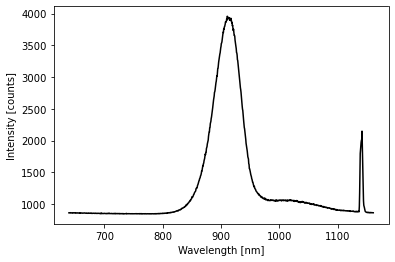

In [29]:
#   Import Data
file_name = 'personal_data/gaas.asc' #the data we will be importing 
PL = np.array(pd.read_table(file_name, index_col=None, header=0)) #read in file as a numpy array where column [0] is wavelength and column [1] is intensity

fig1, ax1 = plt.subplots() #we'll make a plot to see what the data looks like
ax1.plot(PL[:,0], PL[:,1], 'k-') #using pandas notation we can plot wavelength vs. intensity 
ax1.set_xlabel('Wavelength [nm]')
ax1.set_ylabel('Intensity [counts]')

Text(0, 0.5, 'Intensity [a.u.]')

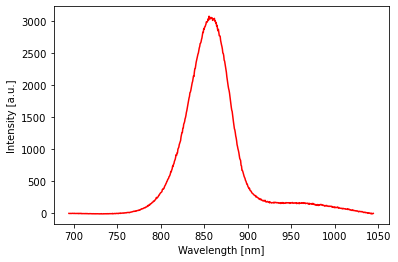

In [30]:
#   Correct Data
#   Remove Background
#   Calibrate
file_name = 'personal_data/laser_543p5.asc' #the data we will be importing 
L_PL = np.array(pd.read_table(file_name, index_col=None, header=0)) #read in file as a numpy array where column [0] is wavelength and column [1] is intensity

shift = L_PL[find_nearest(L_PL[:,1],np.max(L_PL[:,1])),0]-543.5 #shift in wavelenth 
PL_trim = trim_data(PL[:,0], PL[:,1],750,1100) #trim the data to only look at the data between 600 and 900 nm. It is often worthwhile to cut out wavelenghts below 500 nm since we often get counts from our laser in that region
PL_back = back_subtract(PL_trim[0],PL_trim[1],10) #remove a linear background from the PL data
wave_correct = PL_trim[0]-shift 
fig2, ax2 = plt.subplots() #we'll make a plot to see what the data looks like
ax2.plot(wave_correct, PL_back, 'r-') #plot wavelength vs. intensity 
ax2.set_xlabel('Wavelength [nm]')
ax2.set_ylabel('Intensity [a.u.]') #if I've ammended the data in anyway I will generally change the axis from counts to arbitrary unitys (a.u.)


Bandgap 1.448919668091316 855.6996135149853


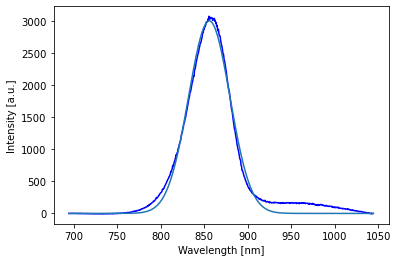

In [31]:
# Fit Peak 
p0 = [3000, 850, 20]
peak, error = curve_fit(gaussian, wave_correct, PL_back, p0)
fig2, ax2 = plt.subplots() #we'll make a plot to see what the data looks like
ax2.plot(wave_correct, PL_back, 'b-') #plot wavelength vs. intensity 
ax2.plot(wave_correct,gaussian(wave_correct,*peak))
ax2.set_xlabel('Wavelength [nm]')
ax2.set_ylabel('Intensity [a.u.]') #if I've ammended the data in anyway I will generally change the axis from counts to arbitrary unitys (a.u.)

print('Bandgap', einstein(peak[1]), peak[1])


#### 2.2.3 Determination of Composition
Now that you know the rough elemental make up from XRF and the electronic bandgap, see if you can determine the chemical composition.

### 2.3 Radiative Efficiency of Copper Samples
#### 2.3.1 PL of your samples
#### 2.3.2 Compare Peak Areas
#### 2.3.3 Theoretical Performance

### 2.1.1 Import and Plot XRD data
Our first step in analysis is to look at our data

In [2]:
#   We'll being by importing the required packages
import pandas as pd #This is a package that is helpful when working with big data sets
import numpy as np  #This is a package that is very helpful when working with arrays of numbers
import matplotlib.pyplot as plt #We will use this for plotting.
from scipy.optimize import curve_fit #This is a package we will use to fit our peaks to a specific function

Text(0, 0.5, 'Intensity [a.u.]')

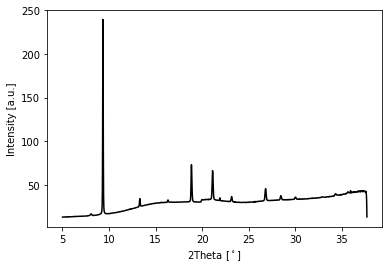

In [6]:
#   Now we'll import the data 
#   xrd_data will be a 2D array where the first column corresponds to two-theta values and the second
#   column is diffracted intensity at a given temperature

#TODO Update this code to open a file of interest, have each member of your team open a different file  
xrd_data = np.array(pd.read_csv('Lab3/perov_302K.csv')) #This takes a csv, reads it in to python and then makes it a numpy array
xrd_temp = '302K'

#TODO Plot your XRD spectra 
plt.plot(xrd_data[:,0],xrd_data[:,1],'k')
plt.xlabel('2Theta [$^\circ$]')
plt.ylabel('Intensity [a.u.]')

Save your plot to your notesheet <font color='red'>(answer 1)

### 2.1.2 Determine the Lattice Constant
This perovskite has a cubic structure, meaning its crystal structure can be completely defined by one lattice constant and we can relate the d-spacing to the lattice constant using the following expression:

$$ d = \frac{a}{\sqrt{h^2+k^2+l^2}} $$

where $a$ is my lattice constant and $h$, $k$, and $l$ are my miller indices. Assuming the highest peak in my pattern corresponds to diffraction from the (100) plane of atoms, determine the lattice constant and check your answer by indexing the remaining peaks. 


Note: Like with all things in coding, this one way to approach this problem, not the only way

In [9]:
#   We'll again use some definitions to solve this problem
#   Be sure you understand what these definitions do before you use them

def find_nearest(array, value):
    #array is a 1D vector
    #value is the specific value for which want the index
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def trim_data(x, data, limit1, limit2):
    #x is a 1D array of two theta
    #data is an array of  intensities
    #limit1 and limit2 are what you'd like to trim your data to 
    test = np.array(x)
    set1 = find_nearest(test,limit1)
    set2 = find_nearest(test,limit2)
    return x[set1:set2], data[set1:set2]

def findmax_inrange(x,data,limit1,limit2):
    #x is a 1D array of two theta values
    #data is an array of  intensities
    #limit1 and limit2 are what you'd like to trim your data to 
    set1 = find_nearest(x,limit1)
    set2 = find_nearest(x,limit2)
    max_int = np.max(data[set1:set2])
    max_theta = x[find_nearest(data,max_int)]
    return max_theta, max_int

def gaussian(x, a, b, c): 
    # this equation will make a gaussian peak profile with 
    # a = max intensity
    # b = peak center
    # 2sqrt(2ln2)*c = full width half max
    return a*np.exp(-(x - b)**2/(2*c**2))

def peak(x, a, b, c, d):
    # assumes each peak is a quassian with some constant background
    return a*np.exp(-(x - b)**2/(2*c**2)) + d

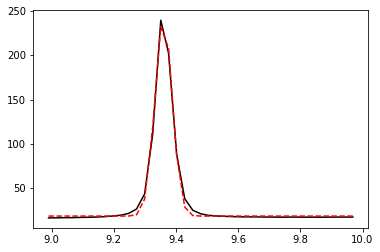

In [10]:
#   We could approach this problem by finding the point of maximum intensity (similar to Lab 2)
#   However, we'll get better results by fitting the peak and using that to determine its peak center
#   To do this we'll use a new python package (scipy). If you'd like a reminder on how to use this package please 
#   check in with Lab 0


#   Set domain of interest
theta_limits = [9,10] #the energy range of interest in degrees

#   Apply those limits 
fit_limit1 = find_nearest(xrd_data[:,0],theta_limits[0])
fit_limit2 = find_nearest(xrd_data[:,0],theta_limits[1])

#   Fit Peak
p0 = [100, 9.5, .1, 10] #this is a best guess at your fit parameters following the above peak definition 
bestpeak, error = curve_fit(peak, xrd_data[fit_limit1:fit_limit2,0], xrd_data[fit_limit1:fit_limit2,1], p0) 

#   Plot data and fit to check in on what's happening
plt.plot(xrd_data[fit_limit1:fit_limit2,0], xrd_data[fit_limit1:fit_limit2,1], 'k-') # plot data
plt.plot(xrd_data[fit_limit1:fit_limit2,0], peak(xrd_data[fit_limit1:fit_limit2,0],*bestpeak), 'r--') # plot fit

#   Your might need to update the above theta limits and initial guess (p0) to get a good fit for your data

6.020283981028056
[9.359844317097856, 13.251621336210228, 16.24809487730144, 18.782874036854395, 21.023728689087363, 26.684732099432825, 28.336220453542968]


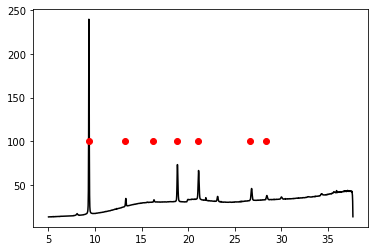

In [22]:
#   Once you have a good fit for your peak you can apply our equation for d-spacing and
#   Bragg's law to determine lattice constant

wave = 0.982381 # Xray wavelength in units of Angstroms
peak_center = bestpeak[1] # Call out the peak center from our best fit parameters

#TODO Write code that takes the peak center and converts it into lattice constant
def lattice_constant(twotheta,wave,miller):
    return wave*np.sqrt(miller[0]**2+miller[1]**2+miller[2]**2)/(2*np.sin(twotheta/2*np.pi/180))

lattice = lattice_constant(peak_center,wave,[1,0,0])
print(lattice)

#TODO Using your lattice constant and Bragg's law index the other peaks 
def guess_twotheta(lattice,wave,miller):
    return 2*np.arcsin(wave*np.sqrt(miller[0]**2+miller[1]**2+miller[2]**2)/(2*lattice))*180/np.pi

miller = [[1,0,0],[1,1,0],[1,1,1],[2,0,0],[2,1,0],[2,2,0],[3,0,0]]
peak_guess = []
intense_list = []
for each in miller:
    guess = guess_twotheta(lattice,wave,each)
    intense = 100
    peak_guess.append(guess)
    intense_list.append(intense)

print(peak_guess)
plt.plot(xrd_data[:,0],xrd_data[:,1],'k')
plt.plot(peak_guess, intense_list, 'ro')

Record your lattice constant and a picture of your indexed diffraction pattern in your notesheet <font color='red'>(answers 2-3)

Note: do for first five peaks

### 2.1.3 Determine Thermal Expansion Coeffient
Working with your team repeat the above exercise (you can omit the indexing step after you've done it once) until you know the lattice constant of this perovskite at the five different temperatures provided. 

With this data set you can now determine thermal expansion coeffient. 

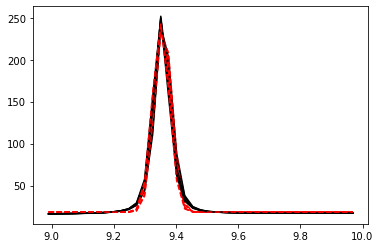

In [40]:
perov_files = ['perov_302K.csv','perov_305K.csv','perov_311K.csv','perov_314K.csv','perov_317K.csv']
temp = [302,305,311,314,317]
lattices = []

for each in perov_files:
    xrd_data = np.array(pd.read_csv('Lab3/'+each)) #This takes a csv, reads it in to python and then makes it a numpy array
    #   Set domain of interest
    theta_limits = [9,10] #the energy range of interest in degrees

    #   Apply those limits 
    fit_limit1 = find_nearest(xrd_data[:,0],theta_limits[0])
    fit_limit2 = find_nearest(xrd_data[:,0],theta_limits[1])

    #   Fit Peak
    p0 = [100, 9.5, .1, 10] #this is a best guess at your fit parameters following the above peak definition 
    bestpeak, error = curve_fit(peak, xrd_data[fit_limit1:fit_limit2,0], xrd_data[fit_limit1:fit_limit2,1], p0) 
    peak_center = bestpeak[1]
    #   Plot data and fit to check in on what's happening
    plt.plot(xrd_data[fit_limit1:fit_limit2,0], xrd_data[fit_limit1:fit_limit2,1], 'k-') # plot data
    plt.plot(xrd_data[fit_limit1:fit_limit2,0], peak(xrd_data[fit_limit1:fit_limit2,0],*bestpeak), 'r--') # plot fit

    lattice = lattice_constant(peak_center,wave,[1,0,0])
    lattices.append(lattice)


0.0003982452900611226


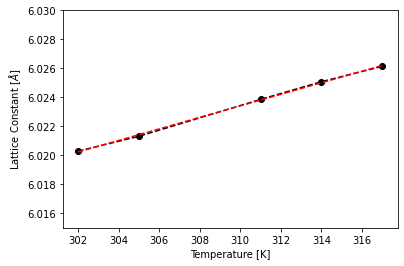

In [61]:
#TODO Make a plot of lattice constant as a function of temperature
plt.plot(temp,lattices,'ko--')
plt.ylabel('Lattice Constant [$\AA$]')
plt.xlabel('Temperature [K]')
plt.ylim(6.015,6.03)

#TODO Write code that will fit that data to a line, and using that fit report the thermal expansion coefficient
def line(x, m, b):
    return m*x+b

alpha,error = curve_fit(line,temp,np.array(lattices))
plt.plot(np.array(temp),line(np.array(temp),*alpha),'r--')
print(alpha[0])

In [53]:
np.array(temp).shape

(5,)

Upload a copy of your graph and record your thermal expansion coefficient to your notebook <font color='red'>(answers 4-5)

## 2.2 Quantifying Copper Oxide
Now that we're familiar with XRD analysis, let's shift the focus to your samples.

In this exercise you are going to compare the XRD data from your copper oxide samples to control samples (Cu, Cu2O, and CuO). Using the tools of XRD analysis you will quantify the composition of your films.

### 2.2.1 Learn how to Collect XRD Data of Your Samples
Given the challenge of getting everyone to Olin and the time of an XRD experiment (each sample takes approximately 20 minutes to analyze), you all won't be running your own experiments this time. However, this instrument is available for you to use! To launch you into future XRD adventures please watch Becky's brief tutorial on how to use the Olin XRD.

### 2.2.1 Make a Comparitive XRD Plot  
Adapt the above code to import and plot three XRD spectra: copper, copper(I) oxide, and copper(II) oxide. Using the copper oxide literature as a guide, index the diffraction peaks observed for these three samples. 

Upload your plot to your notesheet <font color='red'>(answer 6)

Text(0.5, 0, '2Theta [$^\\circ$]')

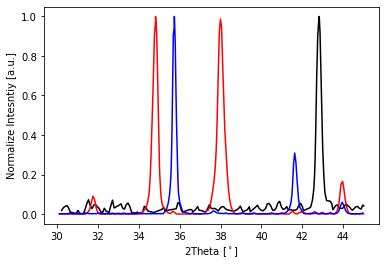

In [66]:
#   Import the data files
xrd_cu = np.array(pd.read_csv('Lab3/copper.csv'))
xrd_cuo = np.array(pd.read_csv('Lab3/cuo.csv'))
xrd_cu2o=np.array(pd.read_csv('Lab3/cu2o.csv'))

#TODO Make comparative XRD graph, you might find it helpful to normalize the data to the max intensity per sample
plt.plot(xrd_cu[:,0],xrd_cu[:,1]/np.max(xrd_cu[:,1]),'k')
plt.plot(xrd_cuo[:,0],xrd_cuo[:,1]/np.max(xrd_cuo[:,1]),'r')
plt.plot(xrd_cu2o[:,0],xrd_cu2o[:,1]/np.max(xrd_cu2o[:,1]),'b')
plt.ylabel('Normalize Intesntiy [a.u.]')
plt.xlabel('2Theta [$^\circ$]')

missing markdown cell

In [71]:
#   To do this exercise you'll first have to determine characterstic angles
#   for your three phases

#   Find angles
copper_theta = findmax_inrange(xrd_cu[:,0],xrd_cu[:,1],42,44) #copper_theta[0] will be characteristic theta
cuo_theta = findmax_inrange(xrd_cuo[:,0],xrd_cuo[:,1],36,40)#TODO use our findmax_inrange to identify the two theta values for the copper oxides
cu2o_theta = findmax_inrange(xrd_cu2o[:,0],xrd_cu2o[:,1],35,37)#TODO use our findmax_inrange to identify the two theta values for the copper oxides
print(copper_theta,cuo_theta,cu2o_theta)
#   With that set, you can import your data
#TODO import and plot XRD of your samples

#   And you can analyze your data
#   To find the intensity near a charateristic angle I would again use the findmax_inrange function
#   but this time I would have that range be very tight around my charateristic angle

#copper_int = findmax_inrange(xrd_data[:,0],xrd_data[:,1],copper_theta-0.2,copper_theta+.2) #Looking for max intensity around the copper peak

#   Finally, use those intensities to determine the relative amounts of copper, Cu2O, and CuO in your films
#TODO Write a piece of code to determine the composition of your film

(42.824381598793366, 311.6252339254788) (37.997549019607845, 2238.467583887943) (35.74335930953578, 5945.447118241238)


Working with your team, determine the composition of your three copper samples. Upload your XRD diffraction patterns and a plot of your compositions as a function of treatment to your notesheet  <font color='red'>(answers 7-8)

## <font color='pink'>Upload a copy of your notesheet with answers 1 through 8 to the Google Drive

# 3. Going Further
The above exercises go over all of the required analysis for this lab, however there is a lot more we can learn from XRD data. If you are feeling adventurous consider doing this additional exercise.

## 3.1 Average Crystal Size
We've looked position and intensity of our XRD peaks, now we can turn our attention to crystal size by looking at peak width.

Peak width can tell us about the size and strain within our crystals. In particular, the Scherrer equation relates peak width to crystal size through the following:

$$\tau ={\frac  {K\lambda }{\beta \cos \theta }}$$

where $\tau$ is the average crystallite size, $\lambda$ is the X-ray wavelength (1.542 Å for the copper data), $\beta$ is the peak broadening (full width at half maximum of a diffraction peak), $\theta$ is the angle of diffraction, and $K$ is called the shape factor (~0.89).

Using the peak fitting process described in exercise 1 and your copper oxide data, write a piece of code that determines the average crystallite size for your copper samples. If you have multiple of copper phases present in your sample, you can determine the average crystallite size for each of the phases.